<a href="https://colab.research.google.com/github/pushparaj-arch/Employee-Salary-Classifier/blob/main/AICTE_INTERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
data=pd.read_csv(r"/content/employee_salary_dataset.csv")

In [ ]:
data

,employee_id,employee_name,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,EMP00001,Ali Garcia,24,Self-emp,33444,Bachelors,15,Married,Sales,Wife,Other,Male,4573,4868,56,Mexico,>50K
1,EMP00002,Alice Chen,54,Private,92469,Bachelors,8,Married,Sales,Own-child,White,Female,1914,1043,48,Mexico,<=50K
2,EMP00003,John Singh,55,Government,71012,HS-grad,2,Separated,Craft-repair,Husband,Asian-Pac-Islander,Male,4104,2343,46,Germany,<=50K
3,EMP00004,Raj Patel,34,Unemployed,25560,Assoc,5,Married,Tech-support,Husband,White,Male,2654,2482,60,Germany,>50K
4,EMP00005,Sara Nguyen,37,Government,75877,Masters,15,Never-married,Sales,Not-in-family,Black,Male,3256,657,28,Mexico,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EMP09996,Alice Kumar,52,Private,20310,Bachelors,10,Married,Exec-managerial,Not-in-family,Other,Female,9815,1937,51,Mexico,<=50K
9996,EMP09997,Eve Garcia,39,Self-emp,64020,Doctorate,13,Married,Prof-specialty,Unmarried,Asian-Pac-Islander,Female,7564,2090,30,United-States,>50K
9997,EMP09998,Bob Brown,45,Self-emp,44646,Masters,4,Divorced,Exec-managerial,Husband,White,Female,1237,3391,36,Mexico,>50K
9998,EMP09999,Raj Patel,37,Government,31992,Bachelors,16,Separated,Sales,Unmarried,Other,Male,6807,2453,40,United-States,>50K


In [ ]:
data.shape
data.head()

,employee_id,employee_name,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,EMP00001,Ali Garcia,24,Self-emp,33444,Bachelors,15,Married,Sales,Wife,Other,Male,4573,4868,56,Mexico,>50K
1,EMP00002,Alice Chen,54,Private,92469,Bachelors,8,Married,Sales,Own-child,White,Female,1914,1043,48,Mexico,<=50K
2,EMP00003,John Singh,55,Government,71012,HS-grad,2,Separated,Craft-repair,Husband,Asian-Pac-Islander,Male,4104,2343,46,Germany,<=50K
3,EMP00004,Raj Patel,34,Unemployed,25560,Assoc,5,Married,Tech-support,Husband,White,Male,2654,2482,60,Germany,>50K
4,EMP00005,Sara Nguyen,37,Government,75877,Masters,15,Never-married,Sales,Not-in-family,Black,Male,3256,657,28,Mexico,>50K


In [ ]:
data.isna()
data.isna().sum()

,0
employee_id,0
employee_name,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0


In [ ]:
print(data.occupation.value_counts())

occupation
Craft-repair       2090
Sales              2030
Prof-specialty     2027
Tech-support       1946
Exec-managerial    1907
Name: count, dtype: int64


In [ ]:
print(data.gender.value_counts())

gender
Female    5036
Male      4964
Name: count, dtype: int64


In [ ]:
print(data.education.value_counts())

education
Doctorate    2038
Assoc        2012
HS-grad      1994
Bachelors    1993
Masters      1963
Name: count, dtype: int64


In [ ]:
print(data['marital-status'].value_counts())

marital-status
Separated        2577
Never-married    2518
Divorced         2494
Married          2411
Name: count, dtype: int64


In [ ]:
print(data.workclass.value_counts())

workclass
Self-emp      2566
Government    2518
Private       2463
Unemployed    2453
Name: count, dtype: int64


In [ ]:
data.replace({'workclass':{'Unemployed':'VIP'}})

,employee_id,employee_name,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,EMP00001,Ali Garcia,24,Self-emp,33444,Bachelors,15,Married,Sales,Wife,Other,Male,4573,4868,56,Mexico,>50K
1,EMP00002,Alice Chen,54,Private,92469,Bachelors,8,Married,Sales,Own-child,White,Female,1914,1043,48,Mexico,<=50K
2,EMP00003,John Singh,55,Government,71012,HS-grad,2,Separated,Craft-repair,Husband,Asian-Pac-Islander,Male,4104,2343,46,Germany,<=50K
3,EMP00004,Raj Patel,34,VIP,25560,Assoc,5,Married,Tech-support,Husband,White,Male,2654,2482,60,Germany,>50K
4,EMP00005,Sara Nguyen,37,Government,75877,Masters,15,Never-married,Sales,Not-in-family,Black,Male,3256,657,28,Mexico,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EMP09996,Alice Kumar,52,Private,20310,Bachelors,10,Married,Exec-managerial,Not-in-family,Other,Female,9815,1937,51,Mexico,<=50K
9996,EMP09997,Eve Garcia,39,Self-emp,64020,Doctorate,13,Married,Prof-specialty,Unmarried,Asian-Pac-Islander,Female,7564,2090,30,United-States,>50K
9997,EMP09998,Bob Brown,45,Self-emp,44646,Masters,4,Divorced,Exec-managerial,Husband,White,Female,1237,3391,36,Mexico,>50K
9998,EMP09999,Raj Patel,37,Government,31992,Bachelors,16,Separated,Sales,Unmarried,Other,Male,6807,2453,40,United-States,>50K


In [ ]:
print(data.workclass.value_counts())

workclass
Self-emp      2566
Government    2518
Private       2463
Unemployed    2453
Name: count, dtype: int64


In [ ]:
data.replace({'occupation':{'Sales':'Marketing'}},inplace=True)
print(data.occupation.value_counts())

occupation
Craft-repair       2090
Marketing          2030
Prof-specialty     2027
Tech-support       1946
Exec-managerial    1907
Name: count, dtype: int64


In [ ]:
data=data[data['workclass']!='Self-emp']
print(data.workclass.value_counts())

workclass
Government    2518
Private       2463
Unemployed    2453
Name: count, dtype: int64


In [ ]:
data = data.drop(columns=['education'], errors='ignore')
data.columns

Index(['employee_id', 'employee_name', 'age', 'workclass', 'fnlwgt',
       'educational-num', 'marital-status', 'occupation', 'relationship',
       'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

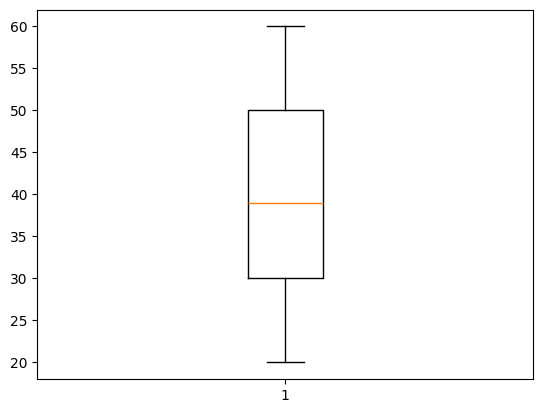

In [ ]:
plt.boxplot(data['age'])
plt.show()

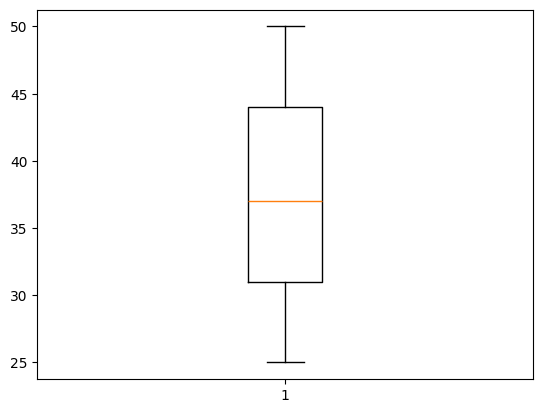

In [ ]:
data=data[(data['age']<=50)&(data['age']>=25)]
plt.boxplot(data['age'])
plt.show()

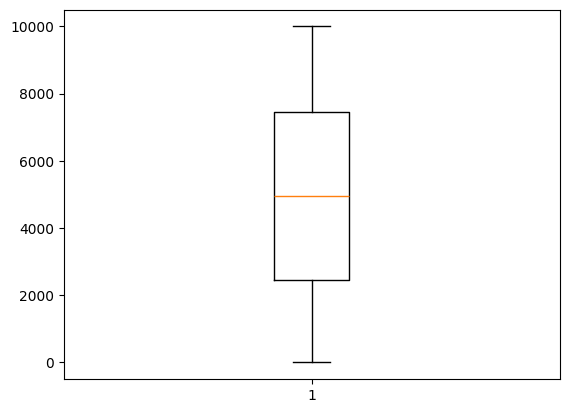

In [ ]:
plt.boxplot(data['capital-gain'])
plt.show()

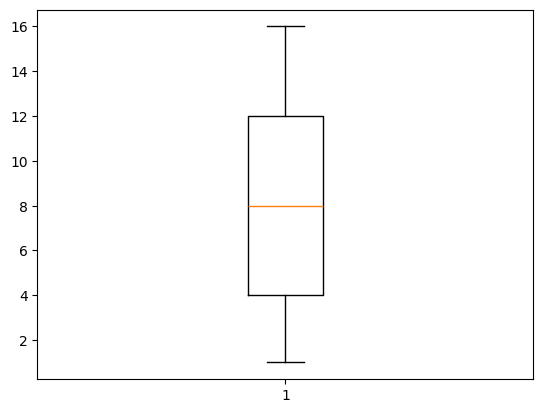

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

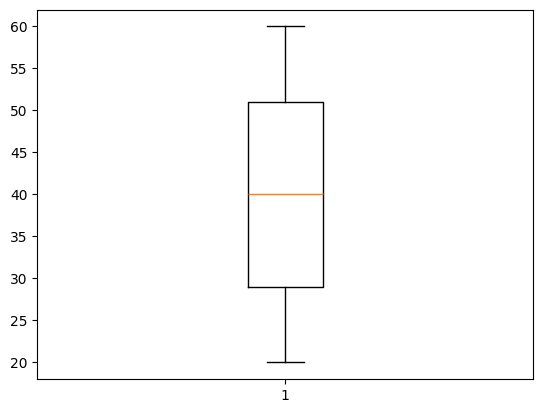

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [ ]:
data = data.drop(columns=['employee_name'], errors='ignore')

In [ ]:
encoder=LabelEncoder()
data.loc[:, 'occupation'] = encoder.fit_transform(data['occupation']).astype('int32')
data.loc[:, 'workclass'] = encoder.fit_transform(data['workclass']).astype('int32')
data.loc[:, 'marital-status'] = encoder.fit_transform(data['marital-status']).astype('int32')
data.loc[:, 'employee_id'] = encoder.fit_transform(data['employee_id']).astype('int32')
data.loc[:, 'relationship'] = encoder.fit_transform(data['relationship']).astype('int32')
data.loc[:, 'race'] = encoder.fit_transform(data['race']).astype('int32')
data.loc[:, 'gender'] = encoder.fit_transform(data['gender']).astype('int32')
data.loc[:, 'native-country'] = encoder.fit_transform(data['native-country']).astype('int32')



In [ ]:
data

,employee_id,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3,0,34,2,25560,5,1,4,0,4,1,2654,2482,60,0,>50K
4,1,37,0,75877,15,2,2,1,2,1,3256,657,28,2,>50K
6,2,43,1,62421,15,0,4,1,4,0,9801,125,36,1,>50K
8,3,45,2,38108,3,0,1,0,2,1,9530,777,55,4,<=50K
9,4,43,0,87333,14,2,1,4,0,0,4297,4833,41,2,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,4707,44,2,79173,8,0,4,2,1,1,6622,4997,60,2,>50K
9992,4708,35,2,80851,5,1,2,2,3,1,4232,2432,27,1,>50K
9993,4709,36,1,48184,9,3,1,3,3,0,9249,2097,40,1,<=50K
9998,4710,37,0,31992,16,3,2,3,3,1,6807,2453,40,4,>50K


In [ ]:
x=data.drop(columns=['income'])
y=data['income']
x

,employee_id,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
3,0,34,2,25560,5,1,4,0,4,1,2654,2482,60,0
4,1,37,0,75877,15,2,2,1,2,1,3256,657,28,2
6,2,43,1,62421,15,0,4,1,4,0,9801,125,36,1
8,3,45,2,38108,3,0,1,0,2,1,9530,777,55,4
9,4,43,0,87333,14,2,1,4,0,0,4297,4833,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,4707,44,2,79173,8,0,4,2,1,1,6622,4997,60,2
9992,4708,35,2,80851,5,1,2,2,3,1,4232,2432,27,1
9993,4709,36,1,48184,9,3,1,3,3,0,9249,2097,40,1
9998,4710,37,0,31992,16,3,2,3,3,1,6807,2453,40,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.5217
              precision    recall  f1-score   support

       <=50K       0.54      0.50      0.52       483
        >50K       0.51      0.55      0.53       460

    accuracy                           0.52       943
   macro avg       0.52      0.52      0.52       943
weighted avg       0.52      0.52      0.52       943

RandomForest Accuracy: 0.4772
              precision    recall  f1-score   support

       <=50K       0.49      0.51      0.50       483
        >50K       0.46      0.44      0.45       460

    accuracy                           0.48       943
   macro avg       0.48      0.48      0.48       943
weighted avg       0.48      0.48      0.48       943

KNN Accuracy: 0.4772
              precision    recall  f1-score   support

       <=50K       0.49      0.46      0.47       483
        >50K       0.47      0.50      0.48       460

    accuracy                           0.48       943
   macro avg       0.48      0.48      0.

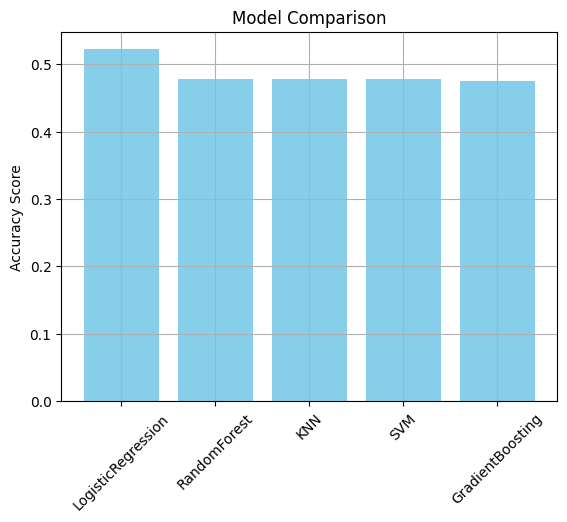

In [ ]:
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
import joblib

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])
best_pipeline.fit(X_train, y_train)
joblib.dump(best_pipeline, "best_model_pipeline.pkl")
print("✅ Saved best model pipeline as best_model_pipeline.pkl")

LogisticRegression: 0.5217
RandomForest: 0.4761
KNN: 0.4772
SVM: 0.4783
GradientBoosting: 0.4740

✅ Best model: LogisticRegression with accuracy 0.5217
✅ Saved best model pipeline as best_model_pipeline.pkl


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import os

st.set_page_config(page_title="Employee Salary Classifier", layout="wide")

st.markdown("""
    <style>
        .main {
            background-color: #0b0c10;
            color: #c5c6c7;
        }
        .stButton>button {
            background-color: #45a29e;
            color: white;
            border-radius: 10px;
            padding: 0.5em 1.5em;
            border: none;
        }
        .stSelectbox, .stSlider, .stTextInput {
            border-radius: 10px !important;
        }
        .block-container {
            padding: 2rem;
        }
        .card {
            background-color: #1f2833;
            padding: 25px;
            border-radius: 15px;
            box-shadow: 0 4px 20px rgba(0,0,0,0.4);
            margin-bottom: 2rem;
        }
        .highlight {
            background-color: #45a29e;
            padding: 12px;
            border-radius: 10px;
            color: #0b0c10;
            font-weight: bold;
        }
    </style>
""", unsafe_allow_html=True)

st.title("💼 Employee Salary Classifier")
st.caption("Classify whether an employee earns >50K or ≤50K using demographic and job-related features")

model_path = "/content/best_model_pipeline.pkl"
model = joblib.load(model_path)

col1, col2 = st.columns([1, 2])

with col1:
    st.markdown("<div class='card'>", unsafe_allow_html=True)
    st.subheader("📝 Employee Information")

    age = st.slider("Age", 25, 50, 30)
    workclass = st.selectbox("Workclass", ['Government', 'Private', 'Unemployed'])
    marital_status = st.selectbox("Marital Status", ['Separated', 'Never-married', 'Divorced', 'Married'])
    occupation = st.selectbox("Occupation", ['Craft-repair', 'Marketing', 'Prof-specialty', 'Tech-support', 'Exec-managerial'])
    relationship = st.selectbox("Relationship", ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Unmarried'])
    race = st.selectbox("Race", ['Other', 'White', 'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo'])
    gender = st.selectbox("Gender", ['Female', 'Male'])
    hours_per_week = st.slider("Hours per week", 1, 80, 40)
    native_country = st.selectbox("Native Country", ['Mexico', 'Germany', 'United-States', 'Philippines', 'Cambodia'])
    st.markdown("</div>", unsafe_allow_html=True)

input_df = pd.DataFrame({
    'employee_id': [0],
    'age': [age],
    'workclass': [workclass],
    'fnlwgt': [0],
    'educational-num': [0],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country]
})

temp = pd.read_csv("/content/employee_salary_dataset.csv")
temp.replace({'workclass': {'Unemployed': 'VIP'}}, inplace=True)
temp = temp[temp['workclass'] != 'Self-emp']
temp = temp[(temp['age'] >= 25) & (temp['age'] <= 50)]

encoders = {}
def encode(col, encoder):
    input_df[col] = encoder.transform(input_df[col]).astype('int32')

for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    encoder = LabelEncoder()
    encoder.fit(temp[col])
    encode(col, encoder)
    encoders[col] = encoder

cols = model.named_steps['scaler'].get_feature_names_out()
input_df = input_df[cols]

with col2:
    st.markdown("<div class='card'>", unsafe_allow_html=True)
    st.subheader("📋 Input Summary")
    st.dataframe(input_df)

    if st.button("🔍 Predict Salary Class"):
        prediction = model.predict(input_df)
        emoji = "💰" if prediction[0] == ">50K" else "📉"
        st.markdown(f"<div class='highlight'> {emoji} Prediction: <strong>{prediction[0]}</strong> </div>", unsafe_allow_html=True)

    st.markdown("### 📂 Batch CSV Prediction")
    uploaded_file = st.file_uploader("Upload CSV File", type="csv")

    if uploaded_file:
        batch_df = pd.read_csv(uploaded_file)
        try:
            for col in encoders:
                batch_df[col] = encoders[col].transform(batch_df[col]).astype('int32')
            for col in ['employee_id', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss']:
                if col not in batch_df.columns:
                    batch_df[col] = 0
            batch_df = batch_df[cols]
            preds = model.predict(batch_df)
            batch_df['PredictedClass'] = preds

            st.write("✅ Predictions:")
            st.dataframe(batch_df)

            csv = batch_df.to_csv(index=False).encode('utf-8')
            st.download_button("⬇️ Download Predictions", csv, "predictions.csv", "text/csv")

        except Exception as e:
            st.error(f"❌ Error during batch prediction: {e}")
    st.markdown("</div>", unsafe_allow_html=True)


Overwriting app.py


In [ ]:
!pip install streamlit pyngrok

In [ ]:
!ngrok authtoken 30Q7N3uxVwFFdyZcK7s8c5hoWqq_5KdBQ9udZFyovH5vXG33x


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading

def run_streamlit():
  os.system("streamlit run app.py --server.port 8501")
thread=threading.Thread(target=run_streamlit)
thread.start()

In [ ]:
from pyngrok import ngrok
import time

time.sleep(10)
try:

    tunnels = ngrok.get_tunnels()
    if tunnels:
        print("Disconnecting active ngrok tunnels:")
        for tunnel in tunnels:
            print(f"  Stopping tunnel: {tunnel.public_url}")
            ngrok.stop_tunnel(tunnel.public_url)
        print("All active ngrok tunnels disconnected.")
    else:
        print("No active ngrok tunnels found.")

    print("Starting ngrok tunnel...")
    public_url = ngrok.connect(8501).public_url
    print(f"🌍 Streamlit app is live at: {public_url}")

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please check your ngrok configuration and try again.")

Disconnecting active ngrok tunnels:
  Stopping tunnel: https://44a690394351.ngrok-free.app
An error occurred: module 'pyngrok.ngrok' has no attribute 'stop_tunnel'
Please check your ngrok configuration and try again.
